In [7]:
lower_bounds = {'LotArea' : 0, '1stFlrSF' : 0}

upper_bounds = {'LotArea' : 100000, '1stFlrSF' : 3000}

In [8]:
is_outside_bounds = (df < lower_bounds) | (df > upper_bounds)
is_outside_bounds.head()

,LotArea,1stFlrSF
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [9]:
row_inds, col_inds = np.where(is_outside_bounds)

pd.DataFrame({'Outlier Row Index' : row_inds, 
              'Outlier Column Index' : col_inds}
            ).head()

,Outlier Row Index,Outlier Column Index
0,249,0
1,313,0
2,335,0
3,496,1
4,523,1


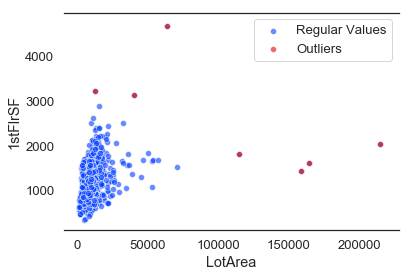

In [10]:
sns.scatterplot(x=df['LotArea'], 
                y=df['1stFlrSF'], 
                color='b', alpha=0.6, label='Regular Values');

sns.scatterplot(x=df.loc[row_inds, 'LotArea'], 
                y=df.loc[row_inds, '1stFlrSF'], 
                color='r', alpha=0.6, label='Outliers');

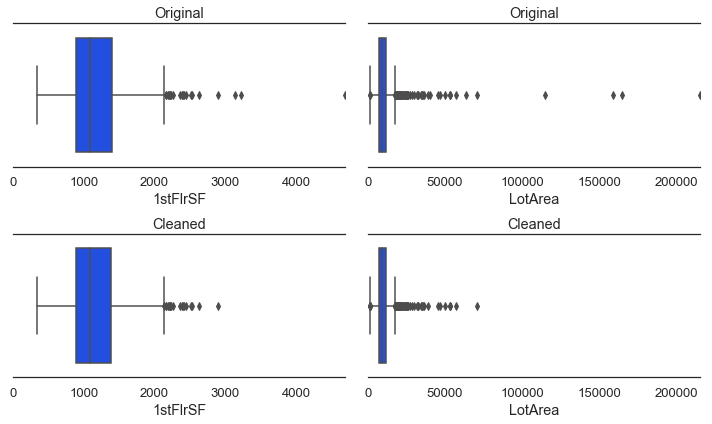

In [11]:
f, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.boxplot(df['1stFlrSF'], ax=axes[0,0])
sns.boxplot(df['LotArea'], ax=axes[0,1])
sns.boxplot(df.drop(row_inds)['1stFlrSF'], ax=axes[1,0])
sns.boxplot(df.drop(row_inds)['LotArea'], ax=axes[1,1])

axes[0,0].set(xlim=(0, df['1stFlrSF'].max()), title='Original')
axes[0,1].set(xlim=(0, df['LotArea'].max()), title='Original')
axes[1,0].set(xlim=(0, df['1stFlrSF'].max()), title='Cleaned')
axes[1,1].set(xlim=(0, df['LotArea'].max()), title='Cleaned')

plt.tight_layout()